ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulmaliklodhra/gold-price-dataset-2016-2026")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gold-price-dataset-2016-2026' dataset.
Path to dataset files: /kaggle/input/gold-price-dataset-2016-2026


In [9]:
import os
os.listdir(path)



['gold_prices_10y.csv']

In [10]:
df_path = os.path.join(path, 'gold_prices_10y.csv')

In [11]:
df = pd.read_csv(df_path)
df.head()

,Date,Close,High,Low,Open,Volume,Adj Close,Daily_Return,MA_20,MA_50,MA_200,Volatility_20,Year,Month,Day_of_Week,Quarter
0,2016-01-29,106.949997,107.000000,106.260002,106.610001,8098700,106.949997,NaN,NaN,NaN,NaN,NaN,2016,1,4,1
1,2016-02-01,108.050003,108.150002,107.529999,107.540001,10471800,108.050003,1.028524,NaN,NaN,NaN,NaN,2016,2,0,1
2,2016-02-02,108.089996,108.180000,107.349998,107.919998,6656000,108.089996,0.037014,NaN,NaN,NaN,NaN,2016,2,1,1
3,2016-02-03,109.250000,109.580002,107.900002,107.910004,15785200,109.250000,1.073183,NaN,NaN,NaN,NaN,2016,2,2,1
4,2016-02-04,110.570000,110.699997,109.919998,110.449997,13213700,110.570000,1.208238,NaN,NaN,NaN,NaN,2016,2,3,1


### Check Missing Values

In [12]:
# Check all values
print(df.isna())

       Date  Close   High    Low   Open  Volume  Adj Close  Daily_Return  \
0     False  False  False  False  False   False      False          True   
1     False  False  False  False  False   False      False         False   
2     False  False  False  False  False   False      False         False   
3     False  False  False  False  False   False      False         False   
4     False  False  False  False  False   False      False         False   
...     ...    ...    ...    ...    ...     ...        ...           ...   
2506  False  False  False  False  False   False      False         False   
2507  False  False  False  False  False   False      False         False   
2508  False  False  False  False  False   False      False         False   
2509  False  False  False  False  False   False      False         False   
2510  False  False  False  False  False   False      False         False   

      MA_20  MA_50  MA_200  Volatility_20   Year  Month  Day_of_Week  Quarter  
0      

In [13]:
print(df.isna().sum())

Date               0
Close              0
High               0
Low                0
Open               0
Volume             0
Adj Close          0
Daily_Return       1
MA_20             19
MA_50             49
MA_200           199
Volatility_20     20
Year               0
Month              0
Day_of_Week        0
Quarter            0
dtype: int64


### Check duplicate rows

In [14]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


### No. of rows and columns

In [15]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (2511, 16) 

number of rows:  2511
number of columns:  16


### Data type of columns

In [16]:
# viewing the data types of columns
df.dtypes

,0
Date,object
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64
Adj Close,float64
Daily_Return,float64
MA_20,float64
MA_50,float64


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

# The 'Amount' column does not exist in this dataset.
# If you wanted to analyze price, you should use 'Close' or 'Adj Close'.

df.dtypes

,0
Date,datetime64[ns]
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64
Adj Close,float64
Daily_Return,float64
MA_20,float64
MA_50,float64


### Descriptive summary Statistics

In [20]:
# Statistical summary
df.describe(include='all')

,Date,Close,High,Low,Open,Volume,Adj Close,Daily_Return,MA_20,MA_50,MA_200,Volatility_20,Year,Month,Day_of_Week,Quarter
count,2511,2511.000000,2511.000000,2511.000000,2511.000000,2.511000e+03,2511.000000,2510.000000,2492.000000,2462.000000,2312.000000,2491.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,2021-01-23 08:43:00.645161472,173.210382,173.940116,172.395440,173.200159,9.006663e+06,173.210382,0.062360,172.471327,171.414909,167.218717,0.871612,2020.561131,6.551971,2.026284,2.516527
min,2016-01-29 00:00:00,106.949997,107.000000,106.260002,106.610001,1.436500e+06,106.949997,-6.426889,109.456000,112.089000,117.232300,0.287247,2016.000000,1.000000,0.000000,1.000000
25%,2018-07-26 12:00:00,123.645000,123.990002,123.200001,123.704998,5.779900e+06,123.645000,-0.445586,123.500126,123.410400,122.558300,0.645702,2018.000000,4.000000,1.000000,2.000000
50%,2021-01-25 00:00:00,164.929993,165.720001,164.289993,165.020004,7.757000e+06,164.929993,0.071563,164.909499,166.267700,167.865275,0.808752,2021.000000,7.000000,2.000000,3.000000
75%,2023-07-24 12:00:00,183.399994,184.034996,182.260002,183.399994,1.069610e+07,183.399994,0.552166,182.536125,180.961800,178.757288,1.002644,2023.000000,10.000000,3.000000,4.000000
max,2026-01-23 00:00:00,458.000000,458.750000,453.450012,454.109985,6.202500e+07,458.000000,4.903838,419.146002,400.148000,342.779000,2.487440,2026.000000,12.000000,4.000000,4.000000
std,NaN,63.167433,63.496196,62.677747,63.129388,5.063950e+06,63.167433,0.937345,61.198300,58.610260,48.713053,0.333071,2.878438,3.423202,1.400095,1.114387


### Univariate Analysis

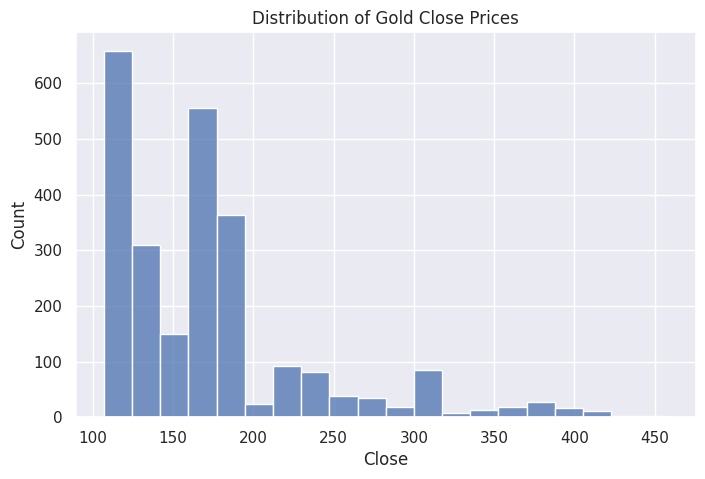

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=20)
plt.title("Distribution of Gold Close Prices")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Revenue

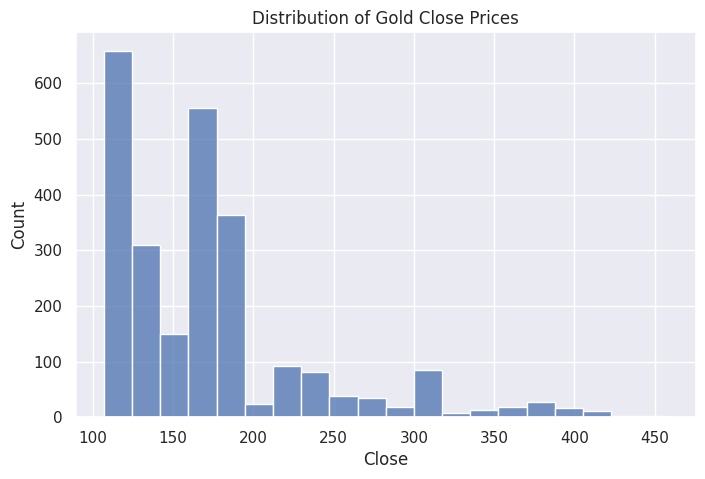

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=20)
plt.title("Distribution of Gold Close Prices")
plt.show()

## Bivariate Analysis

### Revenue by Country

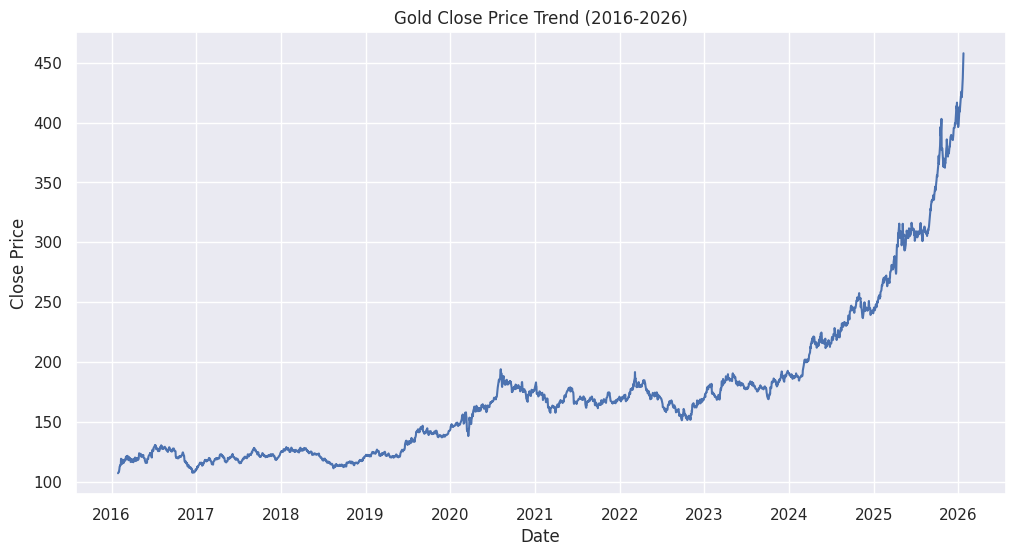

In [24]:

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title("Gold Close Price Trend (2016-2026)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

### Revenue by Product

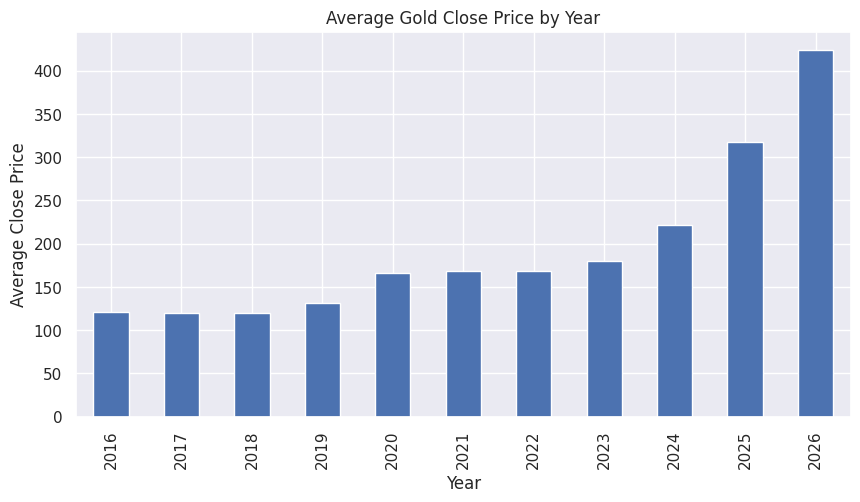

,Close
Year,
2016,120.464103
2017,119.705339
2018,120.177331
2019,131.516944
2020,166.653755
2021,168.311230
2022,167.905139
2023,180.449880
2024,221.099484


In [28]:
# Grouping by Year to see the average Close price
yearly_avg_price = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,5))
yearly_avg_price.plot(kind='bar')
plt.title("Average Gold Close Price by Year")
plt.ylabel("Average Close Price")
plt.show()

yearly_avg_price

### Revenue by Sales Person

In [30]:

yearly_volume = df.groupby('Year')['Volume'].sum().sort_values(ascending=False)

print("Total Trading Volume by Year:")
print(yearly_volume.head(10))

Total Trading Volume by Year:
Year
2020    3111395300
2025    2968028700
2016    2592266400
2019    2198386500
2022    2088968900
2021    2076535600
2018    1894003400
2017    1858437600
2023    1825837500
2024    1741157600
Name: Volume, dtype: int64


### Boxes vs Revenue Relationship

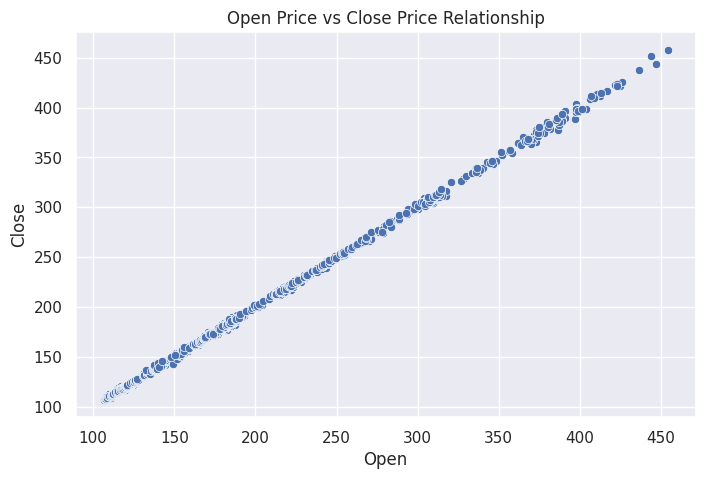

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title("Open Price vs Close Price Relationship")
plt.show()

### Correlation Matrix

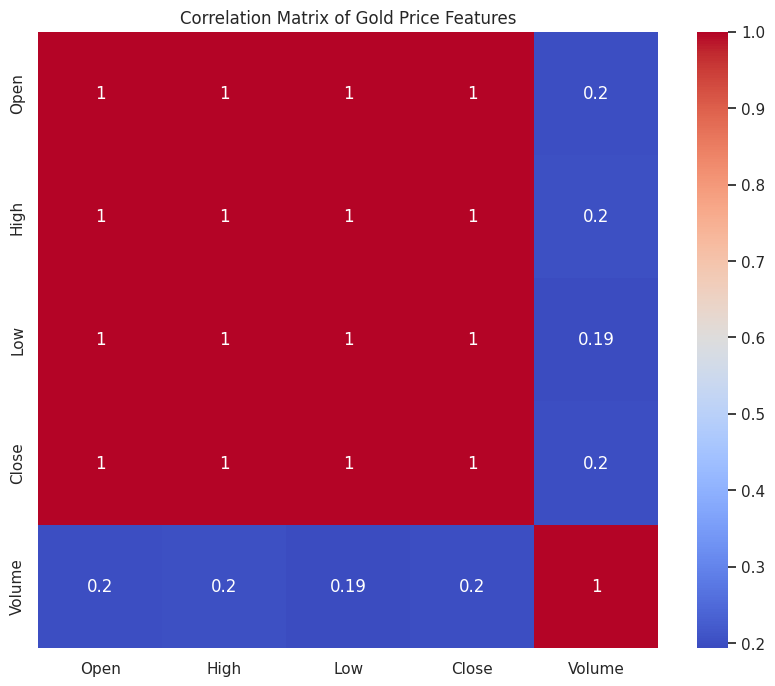

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Gold Price Features")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Revenue Trend

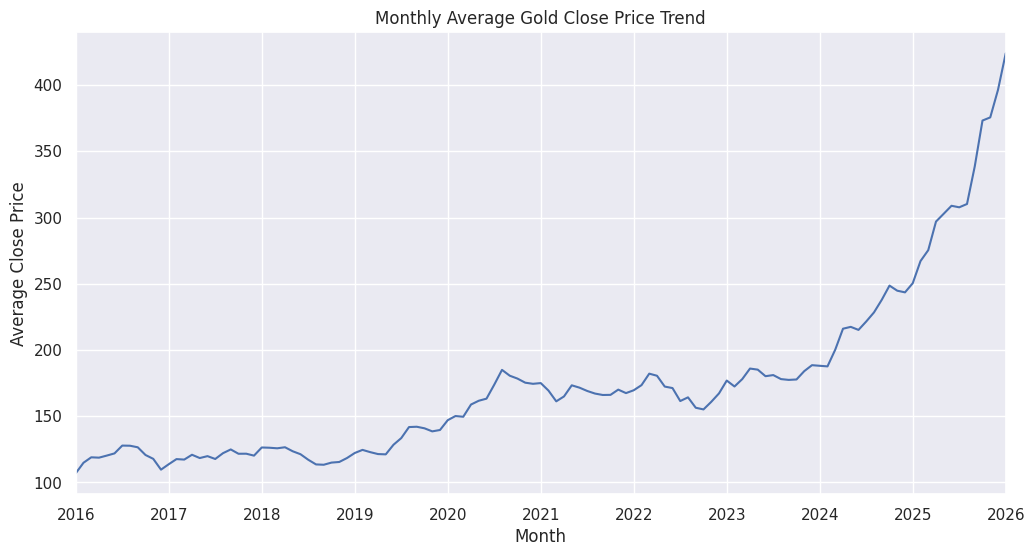

In [37]:
df['Month_Period'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('Month_Period')['Close'].mean()
plt.figure(figsize=(12,6))
monthly_trend.plot()
plt.title("Monthly Average Gold Close Price Trend")
plt.ylabel("Average Close Price")
plt.xlabel("Month")
plt.grid(True)
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.